In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data=pd.read_csv("data/city_data.csv")
ride_data=pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
pyber_df = pd.DataFrame(pd.merge(ride_data, city_data, on= "city", how="left"))

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

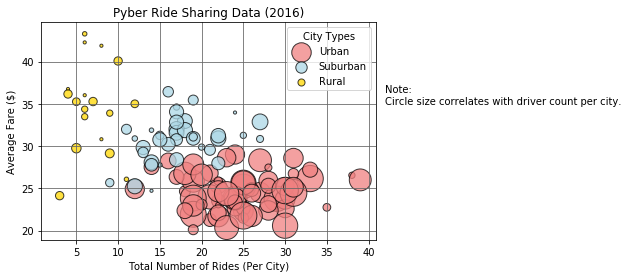

In [3]:
# Obtain the x and y coordinates for each of the three city types
# x=total # of rides
# y=average fare 
# bubble size = driver count

urban_df=pyber_df.loc[pyber_df["type"]=="Urban"]
urban_city_group = urban_df.groupby("city")
urban_x = urban_city_group["ride_id"].count()
urban_y = urban_city_group["fare"].mean()
urban_tot_drivers = urban_city_group["driver_count"].max()

suburban_df=pyber_df.loc[pyber_df["type"]=="Suburban"]
suburban_city_group = suburban_df.groupby("city")
suburban_x = suburban_city_group["ride_id"].count()
suburban_y = suburban_city_group["fare"].mean()
suburban_tot_drivers = suburban_city_group["driver_count"].max()

rural_df=pyber_df.loc[pyber_df["type"]=="Rural"]
rural_city_group = rural_df.groupby("city")
rural_x = rural_city_group["ride_id"].count()
rural_y = rural_city_group["fare"].mean()
rural_tot_drivers = rural_city_group["driver_count"].max()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y,  s=urban_tot_drivers*10, 
            marker="o", 
            edgecolors="black", 
            facecolor="lightcoral",
           alpha=0.75,
           linewidth=1.0)


plt.scatter(suburban_x, suburban_y,  s=suburban_tot_drivers*10, 
            marker="o", 
            edgecolors="black", 
            facecolor="lightblue",
            alpha=0.75,
            linewidth=1.0)

plt.scatter(rural_x, rural_y,  s=rural_tot_drivers*10, 
            marker="o", 
            edgecolors="black", 
            facecolor="gold",
            alpha=0.75,
            linewidth=1.0)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Create a legend
plt.legend(pyber_df["type"].unique(), title="City Types")

# Incorporate a text label regarding circle size
plt.annotate("Note:\nCircle size correlates with driver count per city.", 
             xy=(42,35), 
             annotation_clip=False)

# Save Figure
plt.savefig("PyberBubblePlot.png", bbox_inches="tight")
#Show plot
plt.show()
 

## Total Fares by City Type

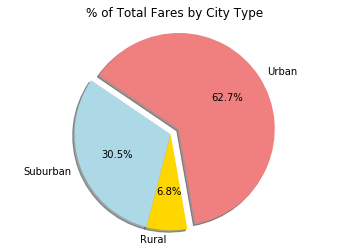

In [4]:

 # Calculate Type Percents
total_fare = pyber_df["fare"].sum()
urban_fare_perc = urban_df["fare"].sum() / total_fare
suburban_fare_perc = suburban_df["fare"].sum() / total_fare
rural_fare_perc = rural_df["fare"].sum() / total_fare

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
percents = [urban_fare_perc, suburban_fare_perc, rural_fare_perc]
colors = ["lightcoral", "lightblue", "gold"]
explode = [0.1,0,0]
plt.pie(percents, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("PyberPieChart1(fares).png")

#show figure
plt.show()

## Total Rides by City Type

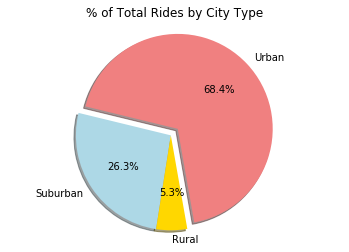

In [5]:
# Calculate Ride Percents
total_rides = pyber_df["ride_id"].count()
urban_ride_perc = urban_df["ride_id"].count() / total_rides
suburban_ride_perc = suburban_df["ride_id"].count() / total_rides
rural_ride_perc = rural_df["ride_id"].count() / total_rides

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
percents = [urban_ride_perc, suburban_ride_perc, rural_ride_perc]
colors = ["lightcoral", "lightblue", "gold"]
explode = [0.1,0,0]
plt.pie(percents, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("PyberPieChart2(rides).png")
#show figure
plt.show() 


## Total Drivers by City Type

In [6]:
 # Calculate Driver Percents
total_drivers = city_data["driver_count"].sum()
urban_data=city_data.loc[city_data["type"]=="Urban"]
suburban_data=city_data.loc[city_data["type"]=="Suburban"]
rural_data=city_data.loc[city_data["type"]=="Rural"]

urban_driver_perc = urban_data["driver_count"].sum() / total_drivers
suburban_driver_perc = suburban_data["driver_count"].sum() / total_drivers
rural_driver_perc = rural_data["driver_count"].sum() / total_drivers

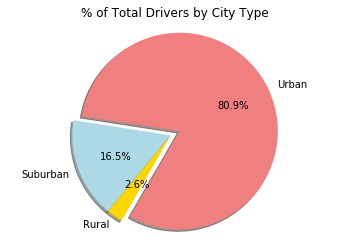

In [7]:
# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
percents = [urban_driver_perc, suburban_driver_perc, rural_driver_perc]
colors = ["lightcoral", "lightblue", "gold"]
explode = [0.1,0,0]
plt.pie(percents, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=240)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("PyberPieChart3(drivers).png")

#show figure
plt.show()

#OBSERVALBE TRENDS:

 1) As city population density (type) increases, supply(drivers) and demand(rides) also increase, while prices(fares) decrease.
  * Higher average fares are correlated with less drivers, and less rides. 
*    In other words, the increase in demand(rides) and its correlated increase in supply(drivers) that exsists in Urabn cities does not appear to be driving up prices(fares),
*   reflecting a traditional supply and demand curve model. 
 2) However the decrease in demand, and its even (greater) decrease in supply is driving up prices in suburban and rural cites. 
 3) According to the data, the average revenue per ride is $34.64 in rural cities, $30.74 in suburban cities, and $24.50 in urban cities.
*   The average # of rides per driver was 2.98 in rural cities, 2.98 in suburban cities and 1.26 in urban cities.
*   These averages suggest that as a pyber driver, you are more likely to earn more income per ride driving in rural cities closely followed by suburban and then urban cites.
*   If drivers flooded the market in rural & suburban cities this could drive prices down, and demand might increase in response to the lower prices. 
*   The top city where you are likely to earn the most fare revenue as an pyber driver is South Brenda where supply is significatly low and demand is moderately high (suburban)
*   The cities where you are least likely to earn the most fare revenue are Port Angela and Reynoldsfurt (both urban) where supply is high and demand is only moderate.
  